## Machine Learning Basic Workflow - 

### For sample using Titanic dataset using any ml algo (lets use k-Nearest neighbors)
#### We will evaluate if certain features like travelling class, sex, age and fare can help us predict survival probablility


In [3]:
import numpy as np
import pandas as pd

#import matplotlib.pyplot as plt

*** Load data from file***

In [4]:
# lets load and see the info of the dataset

titanicdf = pd.read_csv("data-files/titanic.csv")
print(titanicdf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB
None


In [5]:
# A quick sample view
titanicdf.head(3)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


*** Data cleanup - Drop the irrelevant columns ***

In [6]:
# there seems to be handful of columns which we might not need for our analysis 
# lets drop all those column that we know are irrelevant
titanicdf.drop(['embarked','body','boat','name','cabin','home.dest','ticket', 'sibsp', 'parch'], axis='columns', inplace=True)
titanicdf.head(2)

,pclass,survived,sex,age,fare
0,1,1,female,29.0000,211.3375
1,1,1,male,0.9167,151.5500


*** Data analysis ***

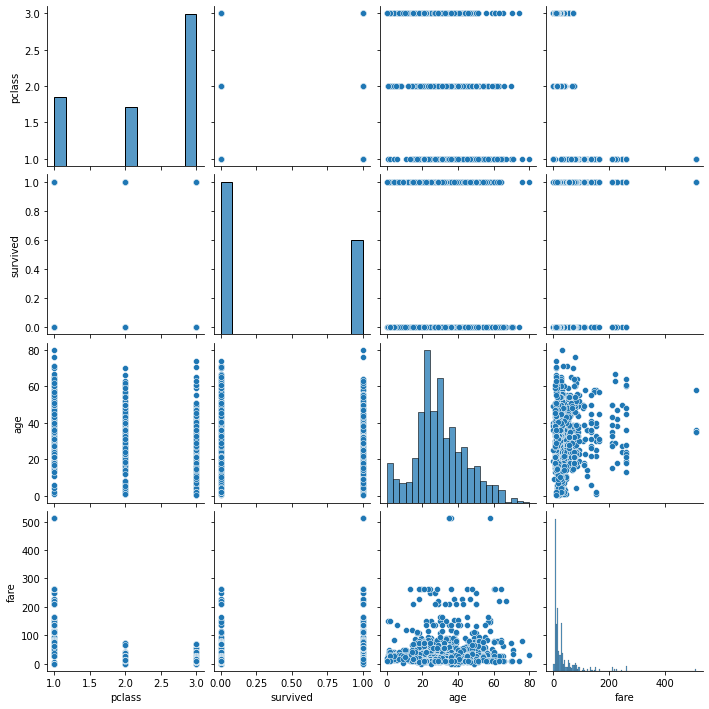

In [7]:
# let's see if there are any highly corelated data
# if we observe something, we will remove that one of the feature to avoid bias

import seaborn as sns

sns.pairplot(titanicdf)

# looking at graphs, seems we don't have anything right away to remove.

***Data transform - Ordinal/Nominal/Datatype, etc ***

In [8]:
# There seems to be 3 class of people, lets represent class as numbers
# We don't have info of relative relation of class so we will one-hot-encode it
titanicdf = pd.get_dummies(titanicdf,columns=['pclass'])
titanicdf.head(2)

,survived,sex,age,fare,pclass_1,pclass_2,pclass_3
0,1,female,29.0000,211.3375,1,0,0
1,1,male,0.9167,151.5500,1,0,0


In [9]:
# Lets Convert sex to a number 
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
titanicdf["sex"] = le.fit_transform(titanicdf.sex) 

titanicdf.head(2)

,survived,sex,age,fare,pclass_1,pclass_2,pclass_3
0,1,0,29.0000,211.3375,1,0,0
1,1,1,0.9167,151.5500,1,0,0


*** Data Imputation - Fill the missing values ***

In [10]:
# When we saw the info, lots of age were missing
# Missing ages values filled with mean age. 
 
titanicdf.loc[ titanicdf["age"].isnull(), "age" ] = titanicdf["age"].mean()
#titanicdf.loc[ titanicdf["fare"].isnull(), "fare" ] = titanicdf["fare"].mean() => can do but we will use another way 
titanicdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  1309 non-null   int64  
 1   sex       1309 non-null   int64  
 2   age       1309 non-null   float64
 3   fare      1308 non-null   float64
 4   pclass_1  1309 non-null   uint8  
 5   pclass_2  1309 non-null   uint8  
 6   pclass_3  1309 non-null   uint8  
dtypes: float64(2), int64(2), uint8(3)
memory usage: 44.9 KB


In [11]:
# When we saw the info,
# 1 fare was missing
# Lets drop that one record
titanicdf.dropna(inplace=True)
titanicdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1308 entries, 0 to 1308
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  1308 non-null   int64  
 1   sex       1308 non-null   int64  
 2   age       1308 non-null   float64
 3   fare      1308 non-null   float64
 4   pclass_1  1308 non-null   uint8  
 5   pclass_2  1308 non-null   uint8  
 6   pclass_3  1308 non-null   uint8  
dtypes: float64(2), int64(2), uint8(3)
memory usage: 54.9 KB


*** Split data - Train/Test dataset ***


In [12]:
X = titanicdf
y = X['survived']
X = X.drop(['survived'], axis=1)
X.head(2)

,sex,age,fare,pclass_1,pclass_2,pclass_3
0,0,29.0000,211.3375,1,0,0
1,1,0.9167,151.5500,1,0,0


In [13]:
y

0       1
1       1
2       0
3       0
4       0
       ..
1304    0
1305    0
1306    0
1307    0
1308    0
Name: survived, Length: 1308, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y)

In [15]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 204 to 728
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sex       981 non-null    int64  
 1   age       981 non-null    float64
 2   fare      981 non-null    float64
 3   pclass_1  981 non-null    uint8  
 4   pclass_2  981 non-null    uint8  
 5   pclass_3  981 non-null    uint8  
dtypes: float64(2), int64(1), uint8(3)
memory usage: 33.5 KB


*** Run ML algorithm data ***

In [16]:
# for now, we are picking any one of the classifier - KN
# Ignore details or syntax for now
from sklearn.neighbors import KNeighborsClassifier

dtc = KNeighborsClassifier(n_neighbors=5)
dtc.fit(X_train,y_train)

KNeighborsClassifier()

*** Check the accuracy of model ***

In [17]:
import sklearn.metrics as met

pred_knc = dtc.predict(X_test)
print( "Nearest neighbors: %.3f" % (met.accuracy_score(y_test, pred_knc)))

Nearest neighbors: 0.667


In [18]:
# Let's re-try and see if normalization helps here
# generally, we do this before model fit. This is first step so it helps in this flow right now. 

*** Normalize training data ***
#### Normalization should be done after splitting the data between training and test set, using only the data from the training set.
#### This is because the test set plays the role of fresh unseen data (real world)
#### Using any information coming from the test set before or during training is a potential bias in the evaluation of the performance.

In [19]:
# Scales each column to have 0 mean and 1 std.dev

X_scaled = preprocessing.scale(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y)

In [20]:
dtc = KNeighborsClassifier(n_neighbors=5)
dtc.fit(X_train,y_train)
pred_knc = dtc.predict(X_test)
print( "Nearest neighbors: %.3f" % (met.accuracy_score(y_test, pred_knc)))

Nearest neighbors: 0.820


*** Fine tune ***

In [30]:
dtc = KNeighborsClassifier(n_neighbors=4)
dtc.fit(X_train,y_train)
pred_knc = dtc.predict(X_test)
print( "Nearest neighbors: %.3f" % (met.accuracy_score(y_test, pred_knc)))

Nearest neighbors: 0.813


In [22]:
# Voila! normalization helped. 